In [1]:
# 🚀 Crypto Trend Dashboard 
import cryptocompare
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

symbol = 'BTC'
#symbol = 'ETH'  # Or 'SOL', 'BNB'

currency = 'USD'
days = 90

# Get daily price data for BTC for last 90 days
data = cryptocompare.get_historical_price_day(symbol, currency=currency, limit=days)
df = pd.DataFrame(data)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)
df.to_csv('BTC_data.csv')
df.head(10)

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2025-01-11,94985.54,93826.56,94710.29,9594.23,9.055867e+08,94569.95,direct,
2025-01-12,95388.08,93675.70,94569.95,10865.93,1.027482e+09,94505.67,direct,
2025-01-13,95894.16,89153.40,94505.67,67978.59,6.274788e+09,94517.66,direct,
2025-01-14,97357.87,94324.09,94517.66,44347.27,4.263471e+09,96526.87,direct,
2025-01-15,100719.11,96466.75,96526.87,43167.20,4.261665e+09,100510.84,direct,
2025-01-16,100867.35,97275.38,100510.84,43426.87,4.314931e+09,99979.43,direct,
2025-01-17,105926.06,99941.15,99979.43,54200.85,5.613810e+09,104111.13,direct,
2025-01-18,104927.11,102234.37,104111.13,25366.61,2.633223e+09,104431.52,direct,
2025-01-19,106317.18,99537.53,104431.52,41597.34,4.325906e+09,101212.56,direct,


In [2]:
# Add SMA, EMA, RSI, Bollinger Bands
df['SMA_20'] = df['close'].rolling(window=20).mean()
df['EMA_20'] = df['close'].ewm(span=20, adjust=False).mean()
# RSI and Bollinger Bands can be added as before
df.head(10)

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,SMA_20,EMA_20
time,,,,,,,,,,
2025-01-11,94985.54,93826.56,94710.29,9594.23,9.055867e+08,94569.95,direct,,NaN,94569.950000
2025-01-12,95388.08,93675.70,94569.95,10865.93,1.027482e+09,94505.67,direct,,NaN,94563.828095
2025-01-13,95894.16,89153.40,94505.67,67978.59,6.274788e+09,94517.66,direct,,NaN,94559.431134
2025-01-14,97357.87,94324.09,94517.66,44347.27,4.263471e+09,96526.87,direct,,NaN,94746.806264
2025-01-15,100719.11,96466.75,96526.87,43167.20,4.261665e+09,100510.84,direct,,NaN,95295.761858
2025-01-16,100867.35,97275.38,100510.84,43426.87,4.314931e+09,99979.43,direct,,NaN,95741.825490
2025-01-17,105926.06,99941.15,99979.43,54200.85,5.613810e+09,104111.13,direct,,NaN,96538.902110
2025-01-18,104927.11,102234.37,104111.13,25366.61,2.633223e+09,104431.52,direct,,NaN,97290.580005
2025-01-19,106317.18,99537.53,104431.52,41597.34,4.325906e+09,101212.56,direct,,NaN,97664.101909


In [3]:
# Bollinger Bands
rolling_std = df['close'].rolling(window=20).std()
df['Upper_Band'] = df['SMA_20'] + (2 * rolling_std)
df['Lower_Band'] = df['SMA_20'] - (2 * rolling_std)


In [4]:
# Relative Strength Index (RSI)
delta = df['close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))


In [5]:
# Export to CSV
file_name = f"{symbol}_trend_dashboard.csv"
df.to_csv(file_name)
print(f"✅ Exported: {file_name}")


✅ Exported: BTC_trend_dashboard.csv


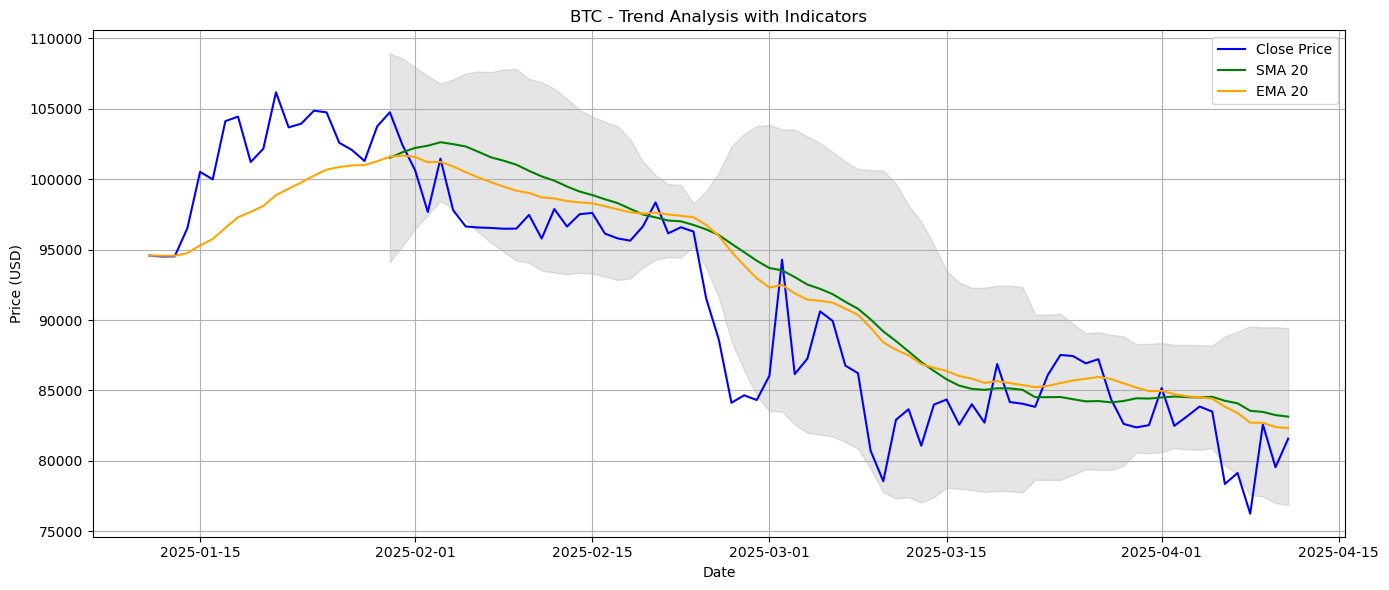

In [6]:
plt.figure(figsize=(14, 6))
plt.plot(df['close'], label='Close Price', color='blue')
plt.plot(df['SMA_20'], label='SMA 20', color='green')
plt.plot(df['EMA_20'], label='EMA 20', color='orange')
plt.fill_between(df.index, df['Lower_Band'], df['Upper_Band'], color='gray', alpha=0.2)
plt.title(f"{symbol} - Trend Analysis with Indicators")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


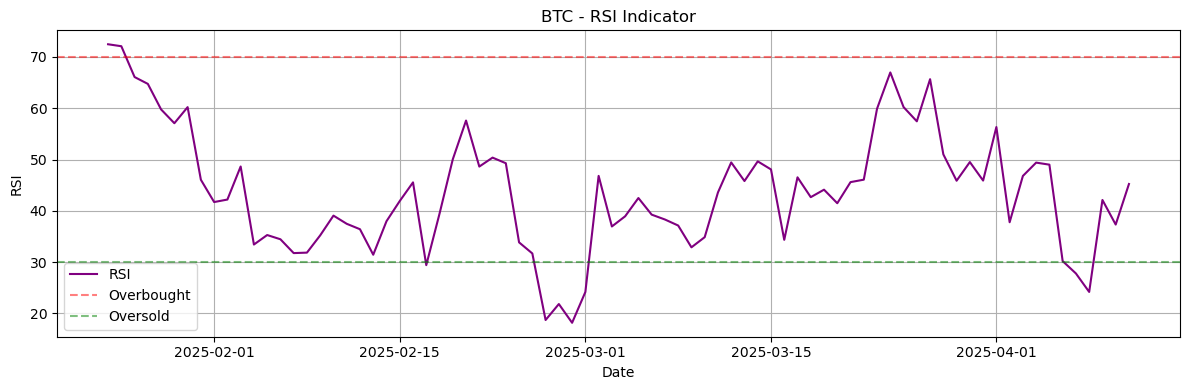

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(df['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', alpha=0.5, label='Overbought')
plt.axhline(30, linestyle='--', color='green', alpha=0.5, label='Oversold')
plt.title(f"{symbol} - RSI Indicator")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


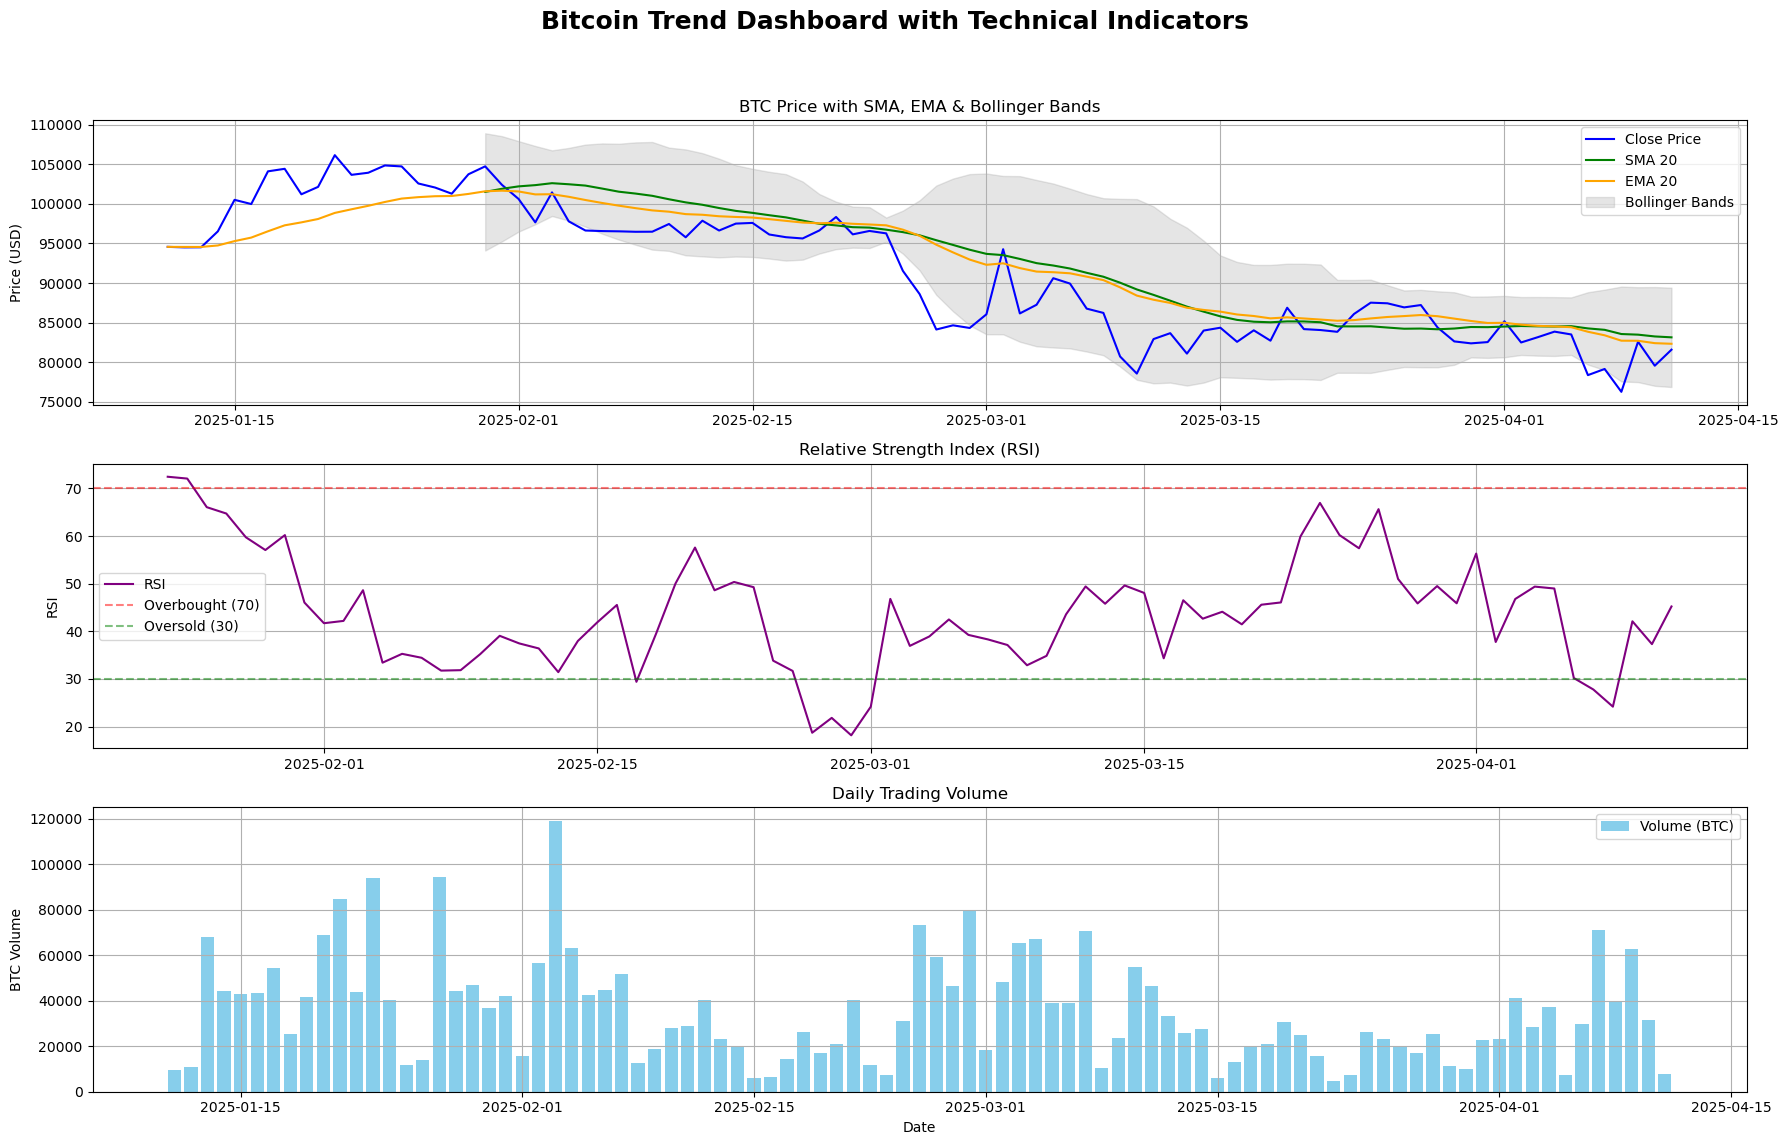

In [13]:
import matplotlib.pyplot as plt

# Create dashboard figure
fig = plt.figure(figsize=(18, 12))
fig.suptitle("Bitcoin Trend Dashboard with Technical Indicators", fontsize=18, fontweight='bold')

# Subplot 1: BTC Price + SMA/EMA + Bollinger Bands
ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(df['close'], label='Close Price', color='blue')
ax1.plot(df['SMA_20'], label='SMA 20', color='green')
ax1.plot(df['EMA_20'], label='EMA 20', color='orange')
ax1.fill_between(df.index, df['Lower_Band'], df['Upper_Band'], color='gray', alpha=0.2, label='Bollinger Bands')
ax1.set_title("BTC Price with SMA, EMA & Bollinger Bands")
ax1.set_ylabel("Price (USD)")
ax1.legend()
ax1.grid(True)

# Subplot 2: RSI Indicator
ax2 = fig.add_subplot(3, 1, 2)
ax2.plot(df['RSI'], label='RSI', color='purple')
ax2.axhline(70, linestyle='--', color='red', alpha=0.5, label='Overbought (70)')
ax2.axhline(30, linestyle='--', color='green', alpha=0.5, label='Oversold (30)')
ax2.set_title("Relative Strength Index (RSI)")
ax2.set_ylabel("RSI")
ax2.legend()
ax2.grid(True)

# Subplot 3: Volume
ax3 = fig.add_subplot(3, 1, 3)
ax3.bar(df.index, df['volumefrom'], color='skyblue', label='Volume (BTC)', width=0.8)
ax3.set_title("Daily Trading Volume")
ax3.set_xlabel("Date")
ax3.set_ylabel("BTC Volume")
ax3.legend()
ax3.grid(True)

# Adjust layout to fit everything
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Export to PNG and PDF
fig.savefig("btc_dashboard_apr2025.png", dpi=300)
fig.savefig("btc_dashboard_apr2025.pdf")

# Display the dashboard
plt.show()


In [2]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.
